In [38]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [40]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
tesla_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) < 2:
        continue
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
    tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [41]:
gme = yf.Ticker("GME")
gme_data = tesla.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [45]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).content
soup_2 = BeautifulSoup(html_data_2, 'html.parser')
tables_2 = soup_2.find_all('table')
gme_table = None
for table in tables_2:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in gme_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) < 2:
        continue
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
    gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


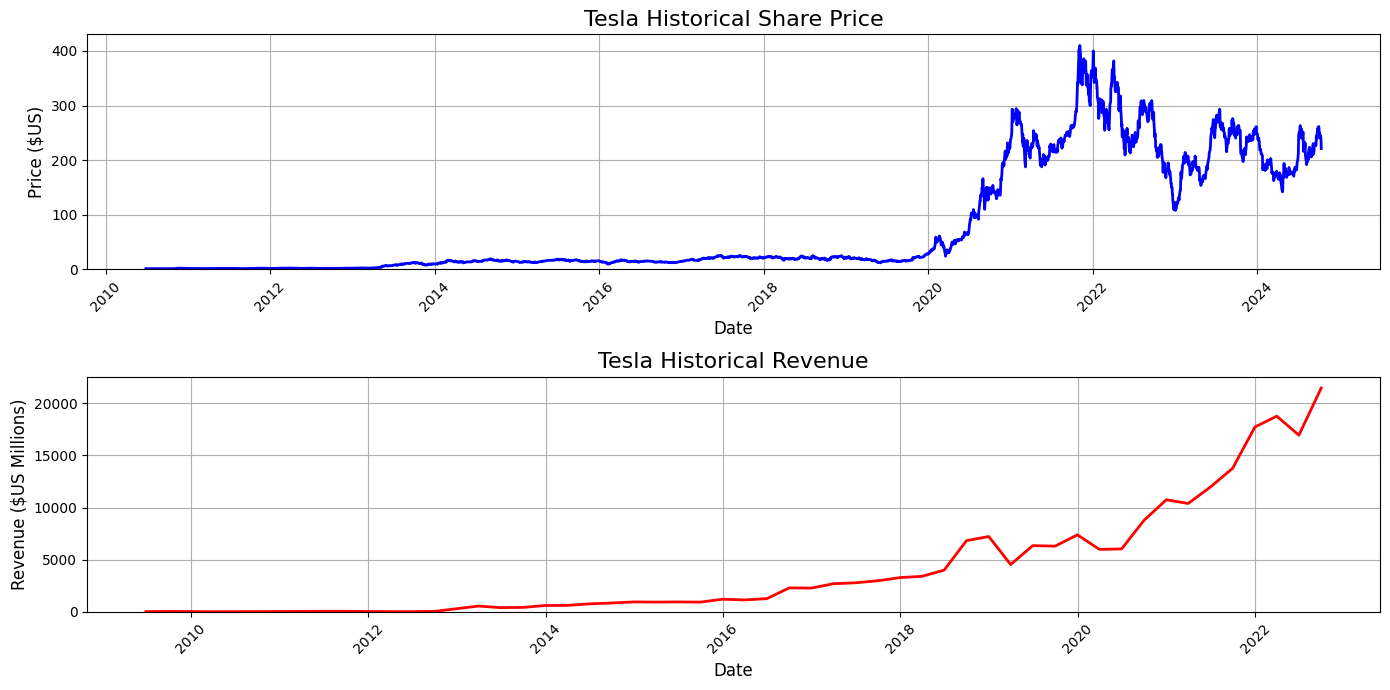

In [53]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Fetch Tesla quarterly revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
tesla_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

# Process the revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) < 2:
        continue
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Clean the revenue data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Convert date to datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Define the modified make_graph function
def make_graph(tesla_data, tesla_revenue, title):
    plt.figure(figsize=(14, 7))

    # Plot stock prices
    plt.subplot(2, 1, 1)
    plt.plot(tesla_data['Date'], tesla_data['Close'], color='blue', linewidth=2)
    plt.title(f"{title} Historical Share Price", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price ($US)", fontsize=12)
    plt.grid(visible=True)
    plt.xticks(rotation=45)

    # Customize y-axis limits and ticks
    plt.ylim(bottom=0)  # Start y-axis at 0
    plt.yticks(fontsize=10)

    # Plot revenue
    plt.subplot(2, 1, 2)
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='red', linewidth=2)
    plt.title(f"{title} Historical Revenue", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Revenue ($US Millions)", fontsize=12)
    plt.grid(visible=True)
    plt.xticks(rotation=45)

    # Customize y-axis limits and ticks
    plt.ylim(bottom=0)  # Start y-axis at 0
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

# Call the make_graph function to display the graphs
make_graph(tesla_data, tesla_revenue, 'Tesla')


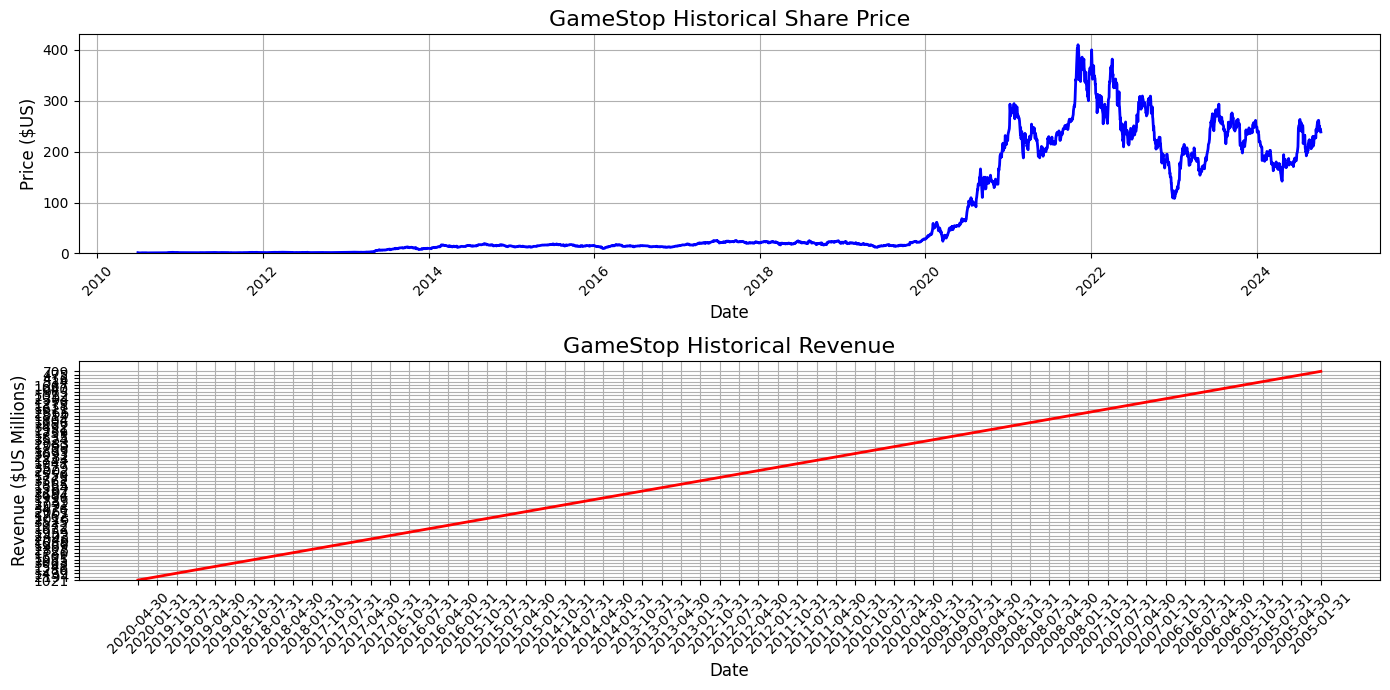

In [55]:
make_graph(gme_data, gme_revenue, 'GameStop')